# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [23]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.3779 - accuracy: 0.8652 - val_loss: 0.3133 - val_accuracy: 0.8859
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2565 - accuracy: 0.9063 - val_loss: 0.2671 - val_accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2107 - accuracy: 0.9229 - val_loss: 0.2591 - val_accuracy: 0.9039
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1763 - accuracy: 0.9342 - val_loss: 0.2509 - val_accuracy: 0.9091
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1475 - accuracy: 0.9452 - val_loss: 0.2530 - val_accuracy: 0.9135


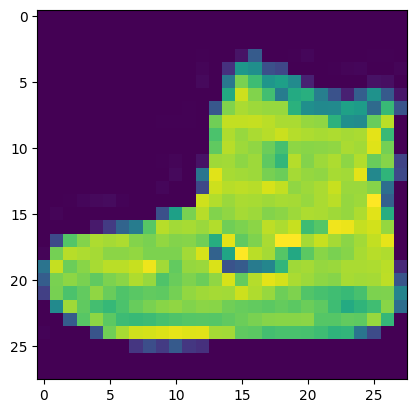

In [24]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)
plt.imshow(x_train[0].reshape(28, 28), cmap='viridis')
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [25]:
x_train = x_train / 255.0
x_test = x_test / 255.0

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [26]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

**Преобразуйте  y_train и y_test в one_hot представления **

In [27]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
model = Sequential([
    Conv2D(32, (4,4), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               589952    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [29]:
history = model.fit(x_train, y_train, epochs=10)
print(history.history)


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.1051 - accuracy: 0.8436
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3626 - accuracy: 0.8767
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3467 - accuracy: 0.8836
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3401 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3320 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3354 - accuracy: 0.8907
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3291 - accuracy: 0.8913
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3227 - accuracy: 0.8944
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3248 - accuracy: 0.8966
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [30]:


y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1000
           1       0.98      0.97      0.97      1000
           2       0.75      0.76      0.75      1000
           3       0.90      0.89      0.89      1000
           4       0.75      0.77      0.76      1000
           5       0.99      0.93      0.96      1000
           6       0.61      0.69      0.65      1000
           7       0.93      0.93      0.93      1000
           8       0.99      0.95      0.97      1000
           9       0.91      0.98      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3181 - accuracy: 0.8993
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3245 - accuracy: 0.8983
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3150 - accuracy: 0.9018
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3150 - accuracy: 0.9023
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3090 - accuracy: 0.9037
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3061 - accuracy: 0.9063
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3030 - accuracy: 0.9055
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3075 - accuracy: 0.9080
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2983 - accuracy: 0.9111
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

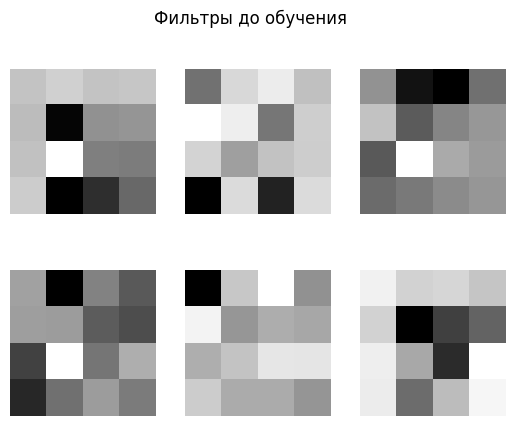

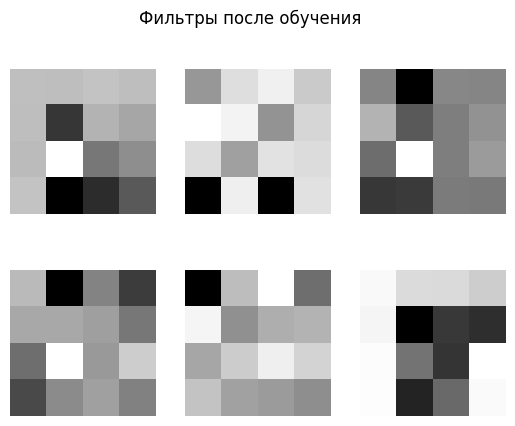

In [31]:
weights_before = model.layers[0].get_weights()[0]
model.fit(x_train, y_train, epochs=10)
weights_after = model.layers[0].get_weights()[0]
def display_filters(weights, title):
    w_min, w_max = weights.min(), weights.max()
    weights = (weights - w_min) / (w_max - w_min)
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(weights[:,:,0,i], cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()
display_filters(weights_before, 'Фильтры до обучения')
display_filters(weights_after, 'Фильтры после обучения')
